# **Missing Values in Titanic DataSet**
1.   **Survived:** Outcome of survival (0 = No; 1 = Yes)
2.  ** Pclass:** Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
3.   **Name:** Name of passenger
4.  ** Sex: **Sex of the passenger
5.  ** Age:** Age of the passenger (Some entries contain NaN)
6.  **SibSp:** Number of siblings and spouses of the passenger aboard
7.  **Parch:** Number of parents and children of the passenger aboard
8.   **Ticket:** Ticket number of the passenger
9.   **Fare: **Fare paid by the passenger
10. **Cabin** Cabin number of the passenger (Some entries contain NaN)
11. **Embarked:** Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

In [2]:
titanic = pd.read_csv("C:\\Users\\34609\\Documents\\Repos Git\\Data\\titanic_train.csv") 
titanic.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.describe() #numerical features 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Use 2 different methods to understand the number of non-null counts per column


In [4]:
titanic.info() #general information about the DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#we can see that for ["Age"], ["Cabin"] & ["Embarked"] there are a lot of missing values. We can also obtained the same information by using:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## Three columns have missing values : Age, Cabin and Embarked.
Calculate the percentage of null values for numeric columns

In [6]:
null_cabin = titanic["Cabin"].isnull().sum() 
percertage = (null_cabin / len(titanic)) * 100
print("The ", round(percertage, 1), "% of the Cabin data are NaN or missing data.")

The  77.1 % of the Cabin data are NaN or missing data.


Which do you think is the best approach for this column?

In [7]:
#Because there are so many missing or invalid data in the ["Cabin"] column the best approach is to eliminate this column 
titanic_mod = titanic.drop(columns = "Cabin")
titanic_mod.head(3) #Not an inplace change just in case we need to revert the change and work with the original DF 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


**Embarked Column**

In [8]:
titanic["Embarked"].unique() #It's a categorical feature, we use .unique to see the values that it takes

array(['S', 'C', 'Q', nan], dtype=object)

In [9]:
titanic["Embarked"].value_counts() #Count the number of features for each category with .value_counts() Does not include the NaN

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
perc_s = (titanic[titanic["Embarked"] == "S"]["Embarked"].count() / titanic["Embarked"].count()) * 100
print("The ", round(perc_s, 1), "% of people registered embarked in S.")

The  72.4 % of people registered embarked in S.


In [11]:
null_embarked = titanic["Embarked"].isnull().sum()
perc_null = (null_embarked / (titanic["Embarked"].count() + null_embarked)) * 100
print("The ", round(perc_null, 1), "% of people have embarked as non-registered.")

The  0.2 % of people have embarked as non-registered.


In [12]:
#Because is a very low amount of missing data we can fill it with the most common data, in this case with "S"
titanic["Embarked"].fillna("S", inplace = True) 

**Age Column**

In [13]:
perc_null_age = (titanic["Age"].isnull().sum() / titanic["Age"].count()) * 100
print("The ", round(perc_null_age, 1), "% of null values in the [Age] column.")

The  24.8 % of null values in the [Age] column.


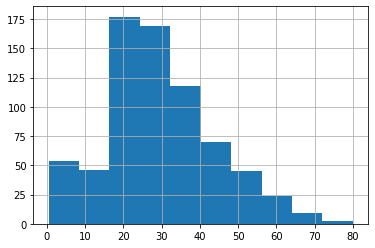

In [14]:
titanic["Age"].hist();

### Build a dataframe with Age and Sex columns

In [15]:
titanic_age = titanic[["Age", "Sex"]]
titanic_age.head(3) #subseting only the 2 rows needed with the automatic indexing

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female


In [20]:
round(titanic.groupby("Sex")["Age"].mean(), 1)

Sex
female    27.9
male      30.7
Name: Age, dtype: float64

In [16]:
#We use a lambda function to fill the null values with the average of the age, depending of the sex category
titanic_age["Age"] = titanic_age.groupby("Sex").transform(lambda x: x.fillna(round(x.mean(), 1))) 
titanic_age.head(3)

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female


### Use a lambda function to  atribute the median of the age per sex to the values to the null values

In [21]:
titanic.groupby("Sex")["Age"].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [22]:
titanic_age["Age"] = titanic_age.groupby("Sex").transform(lambda x: x.fillna(x.median()))
titanic_age.head(3)

,Age,Sex
0,22.0,male
1,38.0,female
2,26.0,female
